### Analyzing the Stroop Effect - Introduction

In a Stroop task (Reference 1), individuals are shown words (a color) in differing colors of ink under two conditions, the congruent condition for which the colored words have ink which match the color of the word (blue written in blue ink, black written in black ink, etc...) and the incongruent condition for which the colored words have ink which do not match the color of the word (blue written in red ink, black written in purple ink, etc...).  The time it takes individuals to accurately state the color of each word is recorded.  The purpose of this project is to take some available data on the time to state the correct color of ink for each condition and determine if the mean difference in times to accurately state the color of the ink between the incongruent and congruent conditions is significantly greater than 0.  My expectation is that the mean difference in times will be significantly greater than 0.  Under the incongruent condition, two different perceptual phenomena will be at play for each individual; the color of ink used and the color of the word itself.  These two phenomena will be different and should cause confusion for each individual, requiring a larger amount of time to accurately state the color of the ink.

### Definition of Independent and Dependent Variables and Hypotheses 

First I will define the independent and dependent variables and the hypotheses so that I know which hypothesis to test in order to determine statistical significance.

Recorded in the stroopdata.csv file are times for each participant to state the correct color of the ink under the congruent and incongruent conditions (Reference 2). Since the time to state the correct color of the ink will depend on the condition, the condition will be the independent variable and the time to correctly state the word will be the dependent variable.

My expectation is that the mean difference between time to accurately state the color of the ink under the incongruent condition and time to accurately state the color of the ink under the congruent condition will be greater than 0. The null and alternative hypotheses for this are as follows:

$$
H_0:\mu_{t_{incongruent}-t_{congruent}} \leq 0
$$
$$
H_1: \mu_{t_{incongruent}-t_{congruent}} > 0
$$

Where $H_0$ and $H_1$ are the null and alternative hypotheses, respectively, $t_{incongruent}$ and $t_{congruent}$ are the times for each subject to state the correct color of ink under the incongruent and congruent conditions, respectively and $\mu_{t_{incongruent}-t_{congruent}}$ is the mean difference in times to state the correct color of the ink between the incongruent and congruent conditions across all subjects.

I chose the null and alternative hypotheses to be the above because I expect to show that the incongruent condition results in larger times to state the correct color than the congruent condition on average.  This is what I think is true and I want to show this.  We allow the alternative hypothesis to be the condition we would like to show to be true (Reference 3).  The null hypothesis is the opposite of the alternative hypothesis and contains an equals sign (Reference 3).

A few things should be mentioned here.  First, we are dealing with two samples and we want to see if the mean difference between times to accurately state the color of the ink under the incongruent and congruent conditions is significantly greater than 0 so we should use a two-sample, right-tailed t-test (Reference 4).  Second, the two samples are related because they come from the same individuals (an individual has a time recorded for both the congruent and incongruent conditions) so we should use a paired t-test (Reference 5).

### Measures of Central Tendency and Variability for difference in sample times between each condition

Before viewing the data visually and performing a statistical test for significance, I will first determine some descriptive statistics for the sample data including two measures of central tendency (mean and median of difference in times between the incongruent and congruent conditions) and one measure of variability.  This will give us an idea of how the sample data differs between the conditions before using a significance test to say something about the overall population.

In [1]:
# Importing both pandas and matplotlib in order to plot the data and find descriptive statistics (References 6 and 7)
import pandas as pd
import matplotlib.pyplot as plt

# Use this command to show the plots inline with the text (Reference 8)
%matplotlib inline

# Read in the data (Reference 9)
df = pd.read_csv('stroopdata.csv')

# See what the dataframe looks like from the first few rows (Reference 10)
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Using shape to see the number of rows and columns in the df dataframe (Reference 11)

df.shape

(24, 2)

In [3]:
# Using .info to see if there are any missing values in the dataframe (Reference 12)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
# I will now add a third column representing the difference in mean times for each subject between the incongruent 
# and congruent conditions.  I can do this since there is no missing data as shown directly above.
df['Diff'] = df['Incongruent'] - df['Congruent']

In [5]:
# See what the dataframe looks like with the difference calculated.
df.head()

,Congruent,Incongruent,Diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [9]:
# Using the .mean() function to find the mean of each column (times to state correct ink under each condition and difference in 
# times between the incongruent and congruent conditions)  (Reference 13).

df.mean()

Congruent      14.051125
Incongruent    22.015917
Diff            7.964792
dtype: float64

In [10]:
# I will also find the median, another measure of central tendency to further determine which condition requires longer times
# to correctly state the color of the ink based on this sample data (Reference 14).
df.median()

Congruent      14.3565
Incongruent    21.0175
Diff            7.6665
dtype: float64

In [11]:
# I will determine the standard deviation to find a measure of variability (Reference 15).
df.std()

Congruent      3.559358
Incongruent    4.797057
Diff           4.864827
dtype: float64

From the above commands, the mean and median difference in time to state the correct color of ink between the incongruent and congruent conditions is 7.96 and 7.67 seconds, respectively. The standard deviation, a measure of variability, is 4.86 seconds for the difference in times to accurately state the color of ink between the incongruent and congruent conditions. For this sample data, the incongruent condition has on average a higher time to state the correct color of ink. It's important to realize that the mean difference in time reported is for the sample size only and does not represent all of the human population. The importance of running a test for statistical significance is that I want to determine the likelihood that there would actually be a mean difference in the times (and that the incongruent condition would have a higher time on average) if we had data for all the human population (Reference 16).

### Visualization of distribution of data for each condition

Now I will visualize the distribution of the data for each condition on the same plot so that I can compare them.  I expect for this sample data that most of the times for the incongruent condition will be greater than (to the right of) the times for the congruent condition.

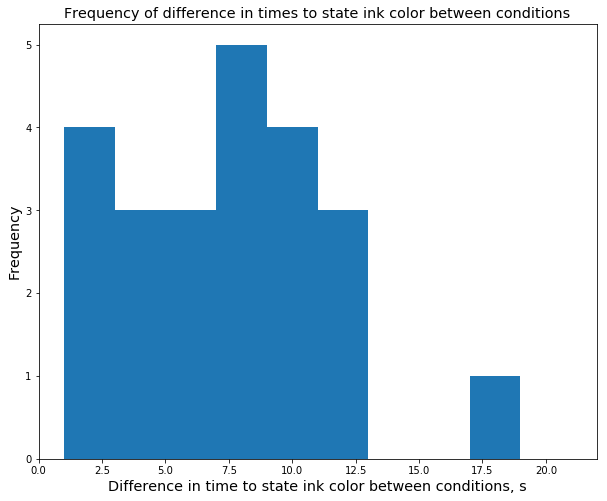

In [12]:
# Adjust figure size (Reference 17)
plt.figure(figsize = (10,8)) 

# Determine binwidth based on minimum and maximum values of difference in times (Reference 18).  I chose a binwidth of 2 after 
# playing around with different values.
bins=range(int(min(df['Diff'])), int(max(df['Diff']) + 2), 2)  

# Plot the histogram (Reference 19)
plt.hist(df['Diff'], bins);

# Label the x axis, y axis, title and adjust the sizes (References 20 and 21)
plt.xlabel('Difference in time to state ink color between conditions, s', size = 'x-large')
plt.ylabel('Frequency', size = 'x-large')
plt.title('Frequency of difference in times to state ink color between conditions', size = 'x-large')
plt.show()

Based on the histogram of the data in the plot directly above, all of the times for the incongruent condition from the sample are greater than the times for the congruent condition.  I suspect this would be true for most humans but a statistical test for significance is needed to infer something about the general population.  This data is only a sample of 24 participants.  This data is not normal because of the two peaks present (the data also more abrubtly drops to the left of the second peak than to the right) and because of a couple of outliers around 17.5 seconds.  Even though the data does not appear to be normal, we can still use the two-sample paired t-test because there is evidence that that this test is robust to non-normality in the samples as long as the sizes of the samples are equal (Reference 22).

### Resources

Reference 1: https://www.psytoolkit.org/lessons/stroop.html

Reference 2: https://classroom.udacity.com/nanodegrees/nd002/parts/1ba6332a-d816-4b97-a32d-f4e684bf11ce/modules/66f6e2ae-c356-4f6f-bed5-73ca5613be95/lessons/33253220-6815-4099-be84-6baf201c56b5/concepts/46699624-0d08-4c1f-b403-19775476fdbe

Reference 3: https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe/modules/e4508dac-d083-427b-be3d-63663aeada68/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/2ff6c25f-c80a-4be2-912e-83639e98774e

Reference 4: http://www.statisticshowto.com/how-to-decide-if-a-hypothesis-test-is-a-left-tailed-test-or-a-right-tailed-test/  

Reference 5: http://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest

Reference 6: http://pandas.pydata.org/pandas-docs/stable/10min.html

Reference 7: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

Reference 8: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline/43028034

Reference 9: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

Reference 10: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

Reference 11: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html

Reference 12: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

Reference 13: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html

Reference 14: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

Reference 15: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html

Reference 16: https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe/modules/e4508dac-d083-427b-be3d-63663aeada68/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/2526e240-f043-4e8e-b7e5-befe0d69769a

Reference 17: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

Reference 18: https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram

Reference 19: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Reference 20: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html

Reference 21: https://matplotlib.org/api/text_api.html#matplotlib.text.Text